# 5.3 지도 시각화

## 5.3.2 데이터 준비

In [1]:
# 예제 5-24 크롤링 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [2]:
# 예제 5-25 위치정보 가져오기
location_counts = raw_total = raw_total['place'].value_counts()
location_counts

Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59
                       ... 
제주마당                      1
형제섬                       1
동복해녀식당                    1
종로 광장시장                   1
디스이즈핫                     1
Name: place, Length: 1028, dtype: int64

In [3]:
# 예제 5-26 등록된 위치정보별 빈도수 데이터
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [4]:
# 예제 5-27 위치정보 빈도수 데이터 저장하기(엑셀로저장)
location_counts_df.to_excel('./files/3_location_counts.xlsx')

In [7]:
# 예제 5-28 위치정보 종류 확인하기
locations = list(location_counts.index)
print(len(locations))
locations[:10]

1028


['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen']

## 5.3.3 카카오 검색 API를 활용한 장소 검색

In [9]:
with open('kakaoapikey.txt') as f:
    api_key = f.read()

In [13]:
# 예제 5-29 카카오 검색 API 사용 예시
import requests
from urllib.parse import quote

searching = '합정 스타벅스'
url = f'https://dapi.kakao.com/v2/local/search/keyword.json?query={quote(searching)}'

headers = {
    "Authorization": f'KakaoAK {api_key}'
    # 입력시 반드시  KakaoAK 뒤에 한 칸 띄우고 API키 값을 적어야 합니다. 
}

places = requests.get(url, headers = headers).json()['documents'][0]
places

{'address_name': '서울 마포구 서교동 395-166',
 'category_group_code': 'CE7',
 'category_group_name': '카페',
 'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
 'distance': '',
 'id': '26572121',
 'phone': '1522-3232',
 'place_name': '스타벅스 서교점',
 'place_url': 'http://place.map.kakao.com/26572121',
 'road_address_name': '서울 마포구 양화로 78',
 'x': '126.916980454434',
 'y': '37.5514601750423'}

In [20]:
# 예제 5-30 카카오 로컬 API를 활용한 장소 검색 함수 만들기
def find_places(searching):
    # 1 접속URL 만들기
    url = f'https://dapi.kakao.com/v2/local/search/keyword.json?query={quote(searching)}'
    # 2 headers 입력하기
    headers = {"Authorization": f'KakaoAK {api_key}'}
    # 3 API 요청&정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    # 4 필요한 정보 선택하기
    place = places[0]
    name = place['place_name']
    x=place['x']
    y=place['y']
    data1 = [name, x, y, searching]

    return data

In [21]:
# 예제 5-31 제주공항 검색 예시
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [22]:
#반복작업 진행시 진행바 표시하기위한 라이브러리 tqdm 활용하기
# ! pip install tqdm        #tqdm 라이브러리 설치하기
from tqdm.notebook import tqdm

In [23]:
# 예제 5-32 인스타그램 위치명 위치정보 검색하기
#### 검색시 시간이 많이 걸려, 현재 작업 진행현황을 볼 수 있도록, tqdm_notebook 추가했습니다

import time
locations_inform = []
for location in tqdm(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
        pass
locations_inform[:10]

  0%|          | 0/1028 [00:00<?, ?it/s]

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관', '126.32785786016811', '33.2915720831759', '제주도 크리스마스 박물관'],
 ['할로비치', '127.020825988861', '37.5182108620338', '할로비치'],
 ['제주에인감귤밭', '126.5390139270361', '33.25656069063887', '제주에인감귤밭'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['석부작박물관', '126.536501983154', '33.2504031491774', '석부작박물관']]

In [24]:
# 예제 5-33 위치정보 저장하기
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official','경도','위도','인스타위치명']
locations_inform_df.to_excel('./files/3_locations.xlsx', index=False)

In [26]:
# 예제 5-34 인스타 게시량 및 위치정보 데이터 불러오기
location_counts_df = pd.read_excel('./files/3_location_counts.xlsx', index_col = 0)
locations_inform_df = pd.read_excel('./files/3_locations.xlsx')

In [27]:
# 예제 5-35 위치 데이터 병합하기
location_data = pd.merge(locations_inform_df, location_counts_df,
                            how = 'inner', left_on = 'name_official', right_index=True)
location_data.head()

,name_official,경도,위도,인스타위치명,place
1,서귀포잠수함,126.558616,33.239303,Seogwipo,1
632,서귀포잠수함,126.558616,33.239303,서귀포잠수함,1
3,할로비치,127.020826,37.518211,할로비치,51
4,제주에인감귤밭,126.539014,33.256561,제주에인감귤밭,48
5,제주도,126.545874,33.379778,Jeju Island,4


In [28]:
# 예제 5-36 데이터 중복 점검하기
location_data['name_official'].value_counts()

오설록티뮤지엄    3
자매국수 본점    3
서귀포잠수함     2
칠돈가 본점     2
산굼부리       2
          ..
삼공주회센터     1
토끼썸        1
애월더선셋      1
난드르바당      1
디스이즈핫      1
Name: name_official, Length: 396, dtype: int64

In [29]:
# 예제 5-37 장소 이름 기준 병합하기
location_data = location_data.pivot_table(index = ['name_official','경도','위도'],
                                            values = 'place', aggfunc='sum')
location_data.head()

,,,place
name_official,경도,위도,
702키친,126.534134,33.498835,1
73st,126.455109,33.456989,1
가드망제,126.532954,33.500991,1
가시식당,126.771438,33.353060,2
가시아방국수,126.918065,33.438605,2


In [30]:
# 예제ㅔ 5-38 병합된 데이터 저장하기
location_data.to_excel('./files/3_location_inform.xlsx')

## 5.3.6 folium을 이용한 지도 시각화 1 - 개별 표시

In [31]:
import pandas as pd

In [32]:
# 예제 5-39 데이터 불러오기
location_data = pd.read_excel('./files/3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  396 non-null    object 
 1   경도             397 non-null    float64
 2   위도             397 non-null    float64
 3   place          397 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.5+ KB


In [33]:
location_data.head()

,name_official,경도,위도,place
0,702키친,126.534134,33.498835,1
1,73st,126.455109,33.456989,1
2,가드망제,126.532954,33.500991,1
3,가시식당,126.771438,33.353060,2
4,가시아방국수,126.918065,33.438605,2


In [36]:
location_data.sort_values(by='place',ascending=False).head(10)

,name_official,경도,위도,place
375,할로비치,127.020826,37.518211,51
293,제주에인감귤밭,126.539014,33.256561,48
171,석부작박물관,126.536502,33.250403,36
284,제주레포츠랜드,126.638755,33.482068,32
260,위미동백나무군락,126.674731,33.272939,18
120,밥깡패,126.263436,33.410093,16
236,오설록티뮤지엄,126.289443,33.305927,15
159,새별오름,126.357731,33.366278,12
150,산굼부리,126.693832,33.432574,12
13,고래배꼽,126.403431,33.480448,12


<AxesSubplot:>

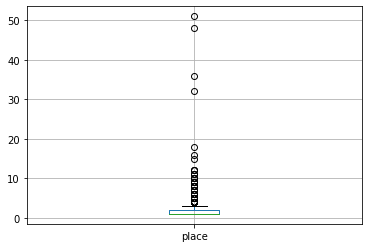

In [37]:
location_data[['place']].boxplot()

In [38]:
# 예제 5-40 지도 표시하기
### 변수명 수정 수정일자 2020.02.17

import folium

Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in location_data.index:
    name = location_data ['name_official'][i]   # 공식명칭
    count = location_data ['place'][i]          # 게시글 개수
    size = int(count)*2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    folium.CircleMarker((long,lat), radius = size, color='red', popup=name).add_to(map_jeju)

map_jeju

In [39]:
# 예제 5-41 지도 저장하기
map_jeju.save('./files/3_jeju.html')

## 4.3.7 folium을 이용한 지도 시각화 2 - 그룹으로 표시

In [41]:
# 예제 5-42 지도 표시하기(마커 집합)
### 변수명 수정  수정일자 2020.02.17

from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]  # 행 하나씩
    locations.append((float(data['위도']),float(data['경도'])))    # 위도 , 경도 순으로..
    names.append(data['name_official'])


Mt_Hanla =[33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)
                       
marker_cluster = MarkerCluster(
    locations=locations, popups=names,
    name='Jeju',
    overlay=True,
    control=True,

)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [42]:
# 예제 5-43 지도 저장하기
map_jeju2.save('./files/3_jeju_cluster.html')